In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [259]:
df = pd.read_csv("final_quality_air.csv")

## Exploratory Data Analysis

In [260]:
df.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,Unnamed: 11
0,201401,1/1/2014,DKI1 (Bunderan HI),77,3,39,54,13,77,PM10,SEDANG,NaN
1,201401,1/2/2014,DKI1 (Bunderan HI),55,4,29,58,12,58,O3,SEDANG,NaN
2,201401,1/3/2014,DKI1 (Bunderan HI),60,5,40,68,13,68,O3,SEDANG,NaN
3,201401,1/4/2014,DKI1 (Bunderan HI),55,7,30,56,14,56,O3,SEDANG,NaN
4,201401,1/5/2014,DKI1 (Bunderan HI),39,4,18,48,10,48,O3,BAIK,NaN


In [261]:
df.columns

Index(['periode_data', 'tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2',
       'max', 'critical', 'categori', 'Unnamed: 11'],
      dtype='object')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14530 entries, 0 to 14529
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   periode_data  14530 non-null  int64  
 1   tanggal       14530 non-null  object 
 2   stasiun       14530 non-null  object 
 3   pm10          14485 non-null  object 
 4   so2           14476 non-null  object 
 5   co            14477 non-null  object 
 6   o3            14451 non-null  object 
 7   no2           14454 non-null  object 
 8   max           14503 non-null  object 
 9   critical      14328 non-null  object 
 10  categori      14530 non-null  object 
 11  Unnamed: 11   0 non-null      float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.3+ MB


In [263]:
df.isnull().sum()

periode_data        0
tanggal             0
stasiun             0
pm10               45
so2                54
co                 53
o3                 79
no2                76
max                27
critical          202
categori            0
Unnamed: 11     14530
dtype: int64

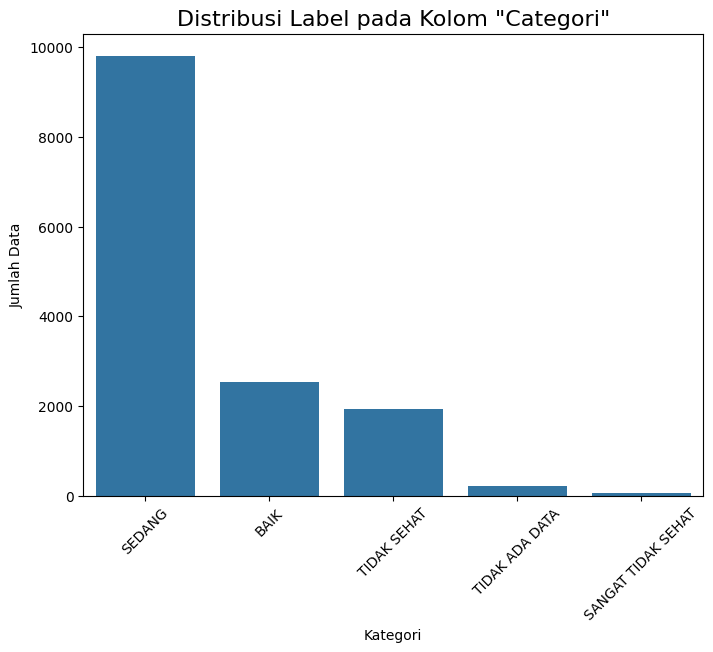

In [264]:
categori_distribution = df['categori'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=categori_distribution.index, y=categori_distribution.values)
plt.title('Distribusi Label pada Kolom "Categori"', fontsize=16)
plt.ylabel('Jumlah Data')
plt.xlabel('Kategori')
plt.xticks(rotation=45)
plt.show()

C:\Users\Ferdinand lowata\AppData\Local\Temp\ipykernel_36560\2113976490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["stasiun"], order=df["stasiun"].value_counts().index, palette="viridis")


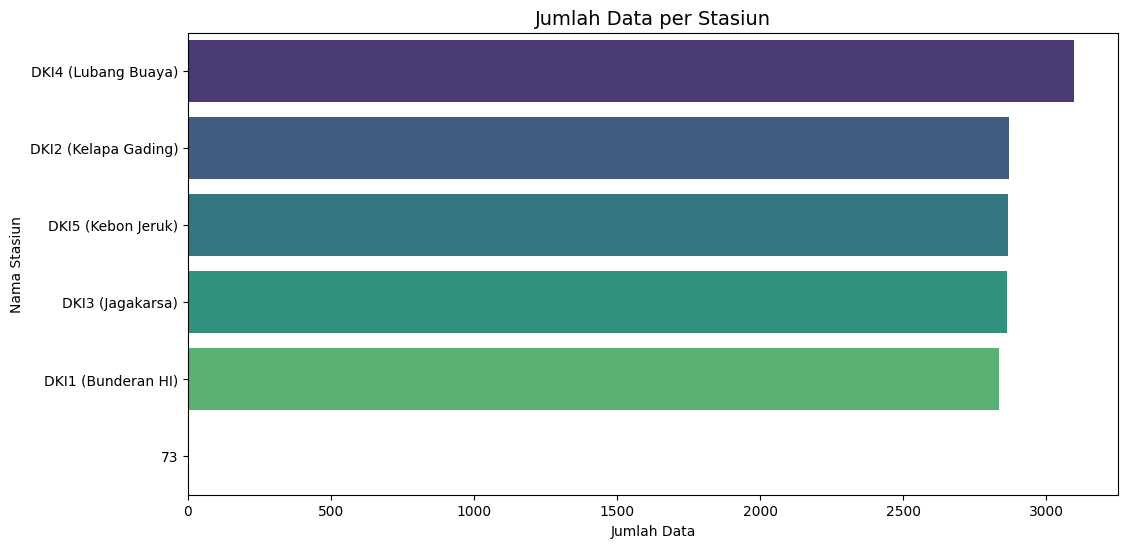

In [265]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["stasiun"], order=df["stasiun"].value_counts().index, palette="viridis")
plt.title("Jumlah Data per Stasiun", fontsize=14)
plt.xlabel("Jumlah Data")
plt.ylabel("Nama Stasiun")
plt.show()

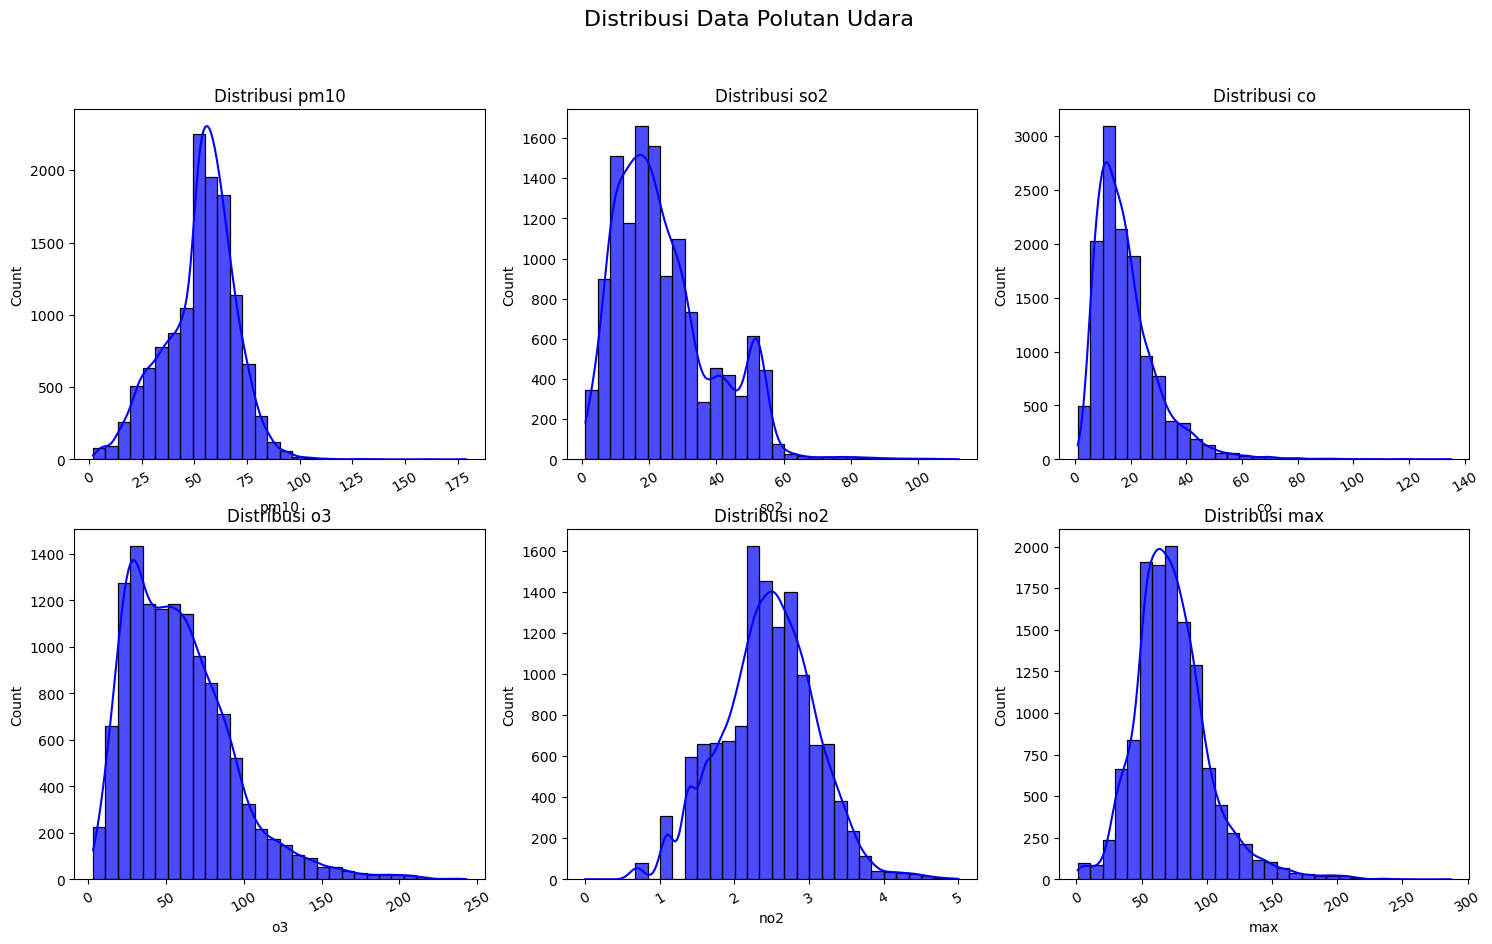

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = ["pm10", "so2", "co", "o3", "no2", "max"]

df_clean = df[features].apply(pd.to_numeric, errors='coerce').dropna()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribusi Data Polutan Udara", fontsize=16)

for i, col in enumerate(features):
    row, col_idx = divmod(i, 3)
    data = df_clean[col]

    if data.max() > 10 * data.median():
        data = np.log1p(data)

    sns.histplot(data, bins=30, kde=True, ax=axes[row, col_idx], color="blue", alpha=0.7)
    axes[row, col_idx].set_title(f"Distribusi {col}")

    axes[row, col_idx].tick_params(axis='x', rotation=30)

plt.show()


C:\Users\Ferdinand lowata\AppData\Local\Temp\ipykernel_36560\484525208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["critical"], palette="coolwarm")


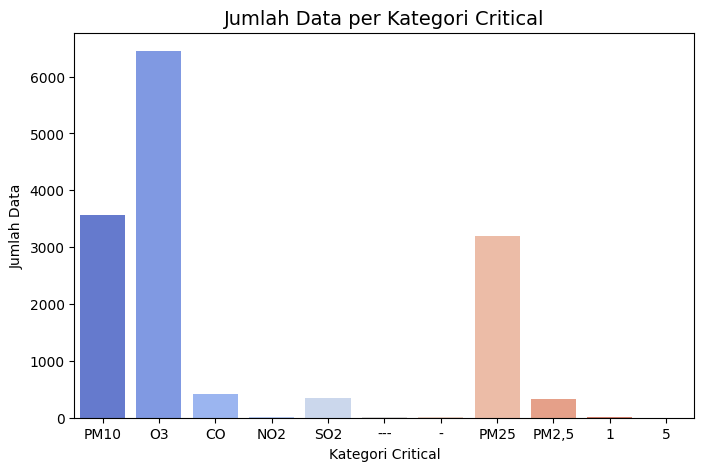

In [267]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["critical"], palette="coolwarm")
plt.title("Jumlah Data per Kategori Critical", fontsize=14)
plt.xlabel("Kategori Critical")
plt.ylabel("Jumlah Data")
plt.show()

## DATA PREPROCESSING

In [268]:
df.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,Unnamed: 11
0,201401,1/1/2014,DKI1 (Bunderan HI),77,3,39,54,13,77,PM10,SEDANG,NaN
1,201401,1/2/2014,DKI1 (Bunderan HI),55,4,29,58,12,58,O3,SEDANG,NaN
2,201401,1/3/2014,DKI1 (Bunderan HI),60,5,40,68,13,68,O3,SEDANG,NaN
3,201401,1/4/2014,DKI1 (Bunderan HI),55,7,30,56,14,56,O3,SEDANG,NaN
4,201401,1/5/2014,DKI1 (Bunderan HI),39,4,18,48,10,48,O3,BAIK,NaN


In [269]:
df.columns

Index(['periode_data', 'tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2',
       'max', 'critical', 'categori', 'Unnamed: 11'],
      dtype='object')

In [270]:
df.drop(['Unnamed: 11'], axis = 1, inplace=True)


In [271]:
df.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,201401,1/1/2014,DKI1 (Bunderan HI),77,3,39,54,13,77,PM10,SEDANG
1,201401,1/2/2014,DKI1 (Bunderan HI),55,4,29,58,12,58,O3,SEDANG
2,201401,1/3/2014,DKI1 (Bunderan HI),60,5,40,68,13,68,O3,SEDANG
3,201401,1/4/2014,DKI1 (Bunderan HI),55,7,30,56,14,56,O3,SEDANG
4,201401,1/5/2014,DKI1 (Bunderan HI),39,4,18,48,10,48,O3,BAIK


In [272]:
df.isnull().sum()

periode_data      0
tanggal           0
stasiun           0
pm10             45
so2              54
co               53
o3               79
no2              76
max              27
critical        202
categori          0
dtype: int64

In [273]:
df = df[df['categori'] != 'TIDAK ADA DATA']
df = df[df['categori'] != 'categori']

In [274]:
cols_to_convert = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [275]:
df.fillna(df.mean(numeric_only=True), inplace=True)

categorical_cols = ['critical', 'categori']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Ferdinand lowata\AppData\Local\Temp\ipykernel_36560\954658871.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [276]:
df.isnull().sum()

periode_data    0
tanggal         0
stasiun         0
pm10            0
so2             0
co              0
o3              0
no2             0
max             0
critical        0
categori        0
dtype: int64

In [277]:
df.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,201401,1/1/2014,DKI1 (Bunderan HI),77.0,3.0,39.0,54.0,13.0,77.0,PM10,SEDANG
1,201401,1/2/2014,DKI1 (Bunderan HI),55.0,4.0,29.0,58.0,12.0,58.0,O3,SEDANG
2,201401,1/3/2014,DKI1 (Bunderan HI),60.0,5.0,40.0,68.0,13.0,68.0,O3,SEDANG
3,201401,1/4/2014,DKI1 (Bunderan HI),55.0,7.0,30.0,56.0,14.0,56.0,O3,SEDANG
4,201401,1/5/2014,DKI1 (Bunderan HI),39.0,4.0,18.0,48.0,10.0,48.0,O3,BAIK


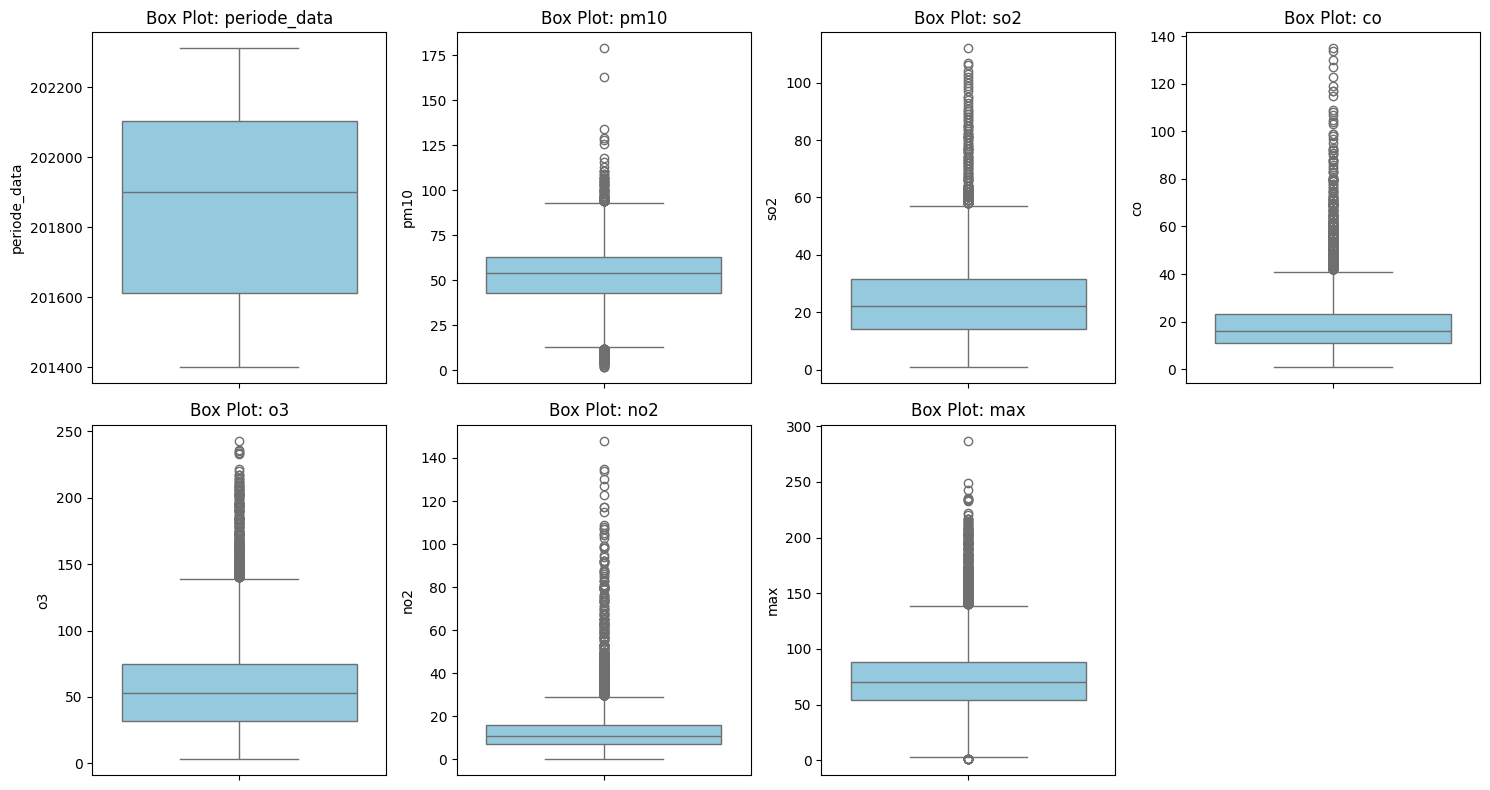

In [278]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, (len(numerical_features) // 2) + 1, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Box Plot: {col}")

plt.tight_layout()
plt.show()

In [279]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

In [280]:
iqr_outliers = detect_outliers_iqr(df, cols_to_convert)

In [281]:
for col in cols_to_convert:
    print("Kolom {} - IQR Outliers: {}".format(col, len(iqr_outliers[col])))

Kolom pm10 - IQR Outliers: 236
Kolom so2 - IQR Outliers: 167
Kolom co - IQR Outliers: 622
Kolom o3 - IQR Outliers: 366
Kolom no2 - IQR Outliers: 738
Kolom max - IQR Outliers: 423


In [282]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

data_no_outliers = remove_outliers_iqr(df, cols_to_convert)

In [283]:
iqr_outliers = detect_outliers_iqr(data_no_outliers, cols_to_convert)

In [284]:
for col in cols_to_convert:
    print("Kolom {} - IQR Outliers: {}".format(col, len(iqr_outliers[col])))

Kolom pm10 - IQR Outliers: 0
Kolom so2 - IQR Outliers: 0
Kolom co - IQR Outliers: 0
Kolom o3 - IQR Outliers: 0
Kolom no2 - IQR Outliers: 0
Kolom max - IQR Outliers: 0


In [285]:
df_cleaned = remove_outliers_iqr(df.copy(), cols_to_convert)

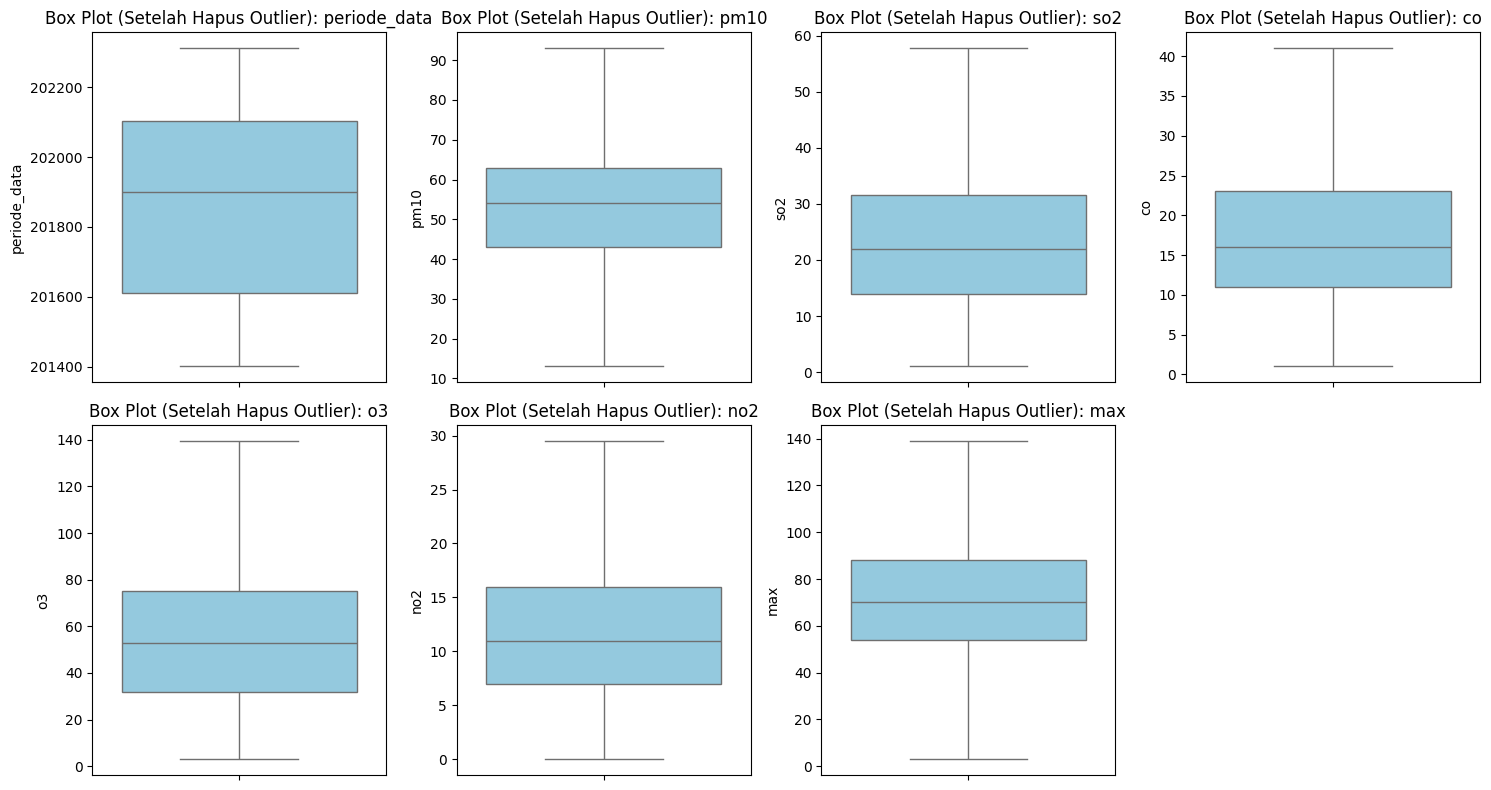

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, (len(numerical_features) // 2) + 1, i)
    sns.boxplot(y=df_cleaned[col], color='skyblue')
    plt.title(f"Box Plot (Setelah Hapus Outlier): {col}")

plt.tight_layout()
plt.show()

In [287]:
df_normalized = df_cleaned.copy()
scaler = MinMaxScaler()

df_normalized[cols_to_convert] = scaler.fit_transform(df_cleaned[cols_to_convert])

df_normalized = df_normalized[df_normalized['categori'] != 'SANGAT TIDAK SEHAT']
df_normalized = df_normalized[df_normalized['categori'] != 'TIDAK ADA DATA']

In [288]:
df_normalized.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,201401,1/1/2014,DKI1 (Bunderan HI),0.8000,0.035242,0.950,0.373626,0.440678,0.544118,PM10,SEDANG
1,201401,1/2/2014,DKI1 (Bunderan HI),0.5250,0.052863,0.700,0.402930,0.406780,0.404412,O3,SEDANG
2,201401,1/3/2014,DKI1 (Bunderan HI),0.5875,0.070485,0.975,0.476190,0.440678,0.477941,O3,SEDANG
3,201401,1/4/2014,DKI1 (Bunderan HI),0.5250,0.105727,0.725,0.388278,0.474576,0.389706,O3,SEDANG
4,201401,1/5/2014,DKI1 (Bunderan HI),0.3250,0.052863,0.425,0.329670,0.338983,0.330882,O3,BAIK


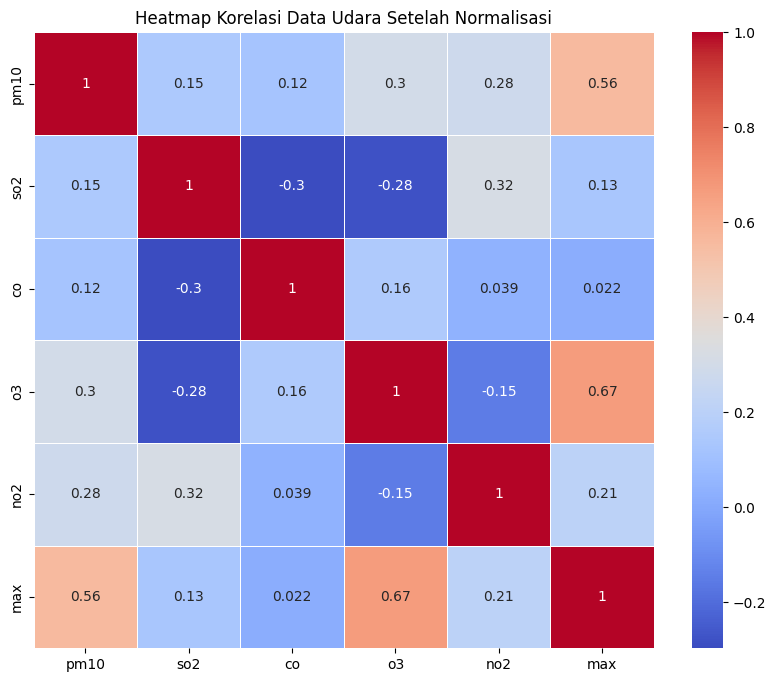

In [289]:
numeric_cols = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']
df_numeric = df_normalized[numeric_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Data Udara Setelah Normalisasi")
plt.show()

## Feature Engineering

### - Encoding

In [290]:
def udara(kualitas):
  if kualitas == "BAIK":
    return 3
  elif kualitas == "SEDANG":
    return 2
  elif kualitas== "TIDAK SEHAT":
    return 1
  else:
    return 0
df["kualitas_udara"] = df['categori'].apply(udara)

df.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,kualitas_udara
0,201401,1/1/2014,DKI1 (Bunderan HI),77.0,3.0,39.0,54.0,13.0,77.0,PM10,SEDANG,2
1,201401,1/2/2014,DKI1 (Bunderan HI),55.0,4.0,29.0,58.0,12.0,58.0,O3,SEDANG,2
2,201401,1/3/2014,DKI1 (Bunderan HI),60.0,5.0,40.0,68.0,13.0,68.0,O3,SEDANG,2
3,201401,1/4/2014,DKI1 (Bunderan HI),55.0,7.0,30.0,56.0,14.0,56.0,O3,SEDANG,2
4,201401,1/5/2014,DKI1 (Bunderan HI),39.0,4.0,18.0,48.0,10.0,48.0,O3,BAIK,3


In [291]:
scaler = MinMaxScaler()  
features_to_scale = ["pm10", "so2", "co", "o3", "no2", "max"]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,kualitas_udara
0,201401,1/1/2014,DKI1 (Bunderan HI),0.8000,0.035242,0.950,0.373626,0.440678,0.544118,PM10,SEDANG,2
1,201401,1/2/2014,DKI1 (Bunderan HI),0.5250,0.052863,0.700,0.402930,0.406780,0.404412,O3,SEDANG,2
2,201401,1/3/2014,DKI1 (Bunderan HI),0.5875,0.070485,0.975,0.476190,0.440678,0.477941,O3,SEDANG,2
3,201401,1/4/2014,DKI1 (Bunderan HI),0.5250,0.105727,0.725,0.388278,0.474576,0.389706,O3,SEDANG,2
4,201401,1/5/2014,DKI1 (Bunderan HI),0.3250,0.052863,0.425,0.329670,0.338983,0.330882,O3,BAIK,3


In [292]:
bins = [0, 50, 100, 250, np.inf]
labels = ["Rendah", "Sedang", "Tinggi", "Berbahaya"]
df["pm10_level"] = pd.cut(df["pm10"] * 100, bins=bins, labels=labels)  # Dikembalikan ke skala asli sebelum bining
df.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,kualitas_udara,pm10_level
0,201401,1/1/2014,DKI1 (Bunderan HI),0.8000,0.035242,0.950,0.373626,0.440678,0.544118,PM10,SEDANG,2,Sedang
1,201401,1/2/2014,DKI1 (Bunderan HI),0.5250,0.052863,0.700,0.402930,0.406780,0.404412,O3,SEDANG,2,Sedang
2,201401,1/3/2014,DKI1 (Bunderan HI),0.5875,0.070485,0.975,0.476190,0.440678,0.477941,O3,SEDANG,2,Sedang
3,201401,1/4/2014,DKI1 (Bunderan HI),0.5250,0.105727,0.725,0.388278,0.474576,0.389706,O3,SEDANG,2,Sedang
4,201401,1/5/2014,DKI1 (Bunderan HI),0.3250,0.052863,0.425,0.329670,0.338983,0.330882,O3,BAIK,3,Rendah


In [293]:
df["pm10_so2_ratio"] = df["pm10"] / (df["so2"] + 1e-5) 
df["co_o3_interaction"] = df["co"] * df["o3"]
df.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,kualitas_udara,pm10_level,pm10_so2_ratio,co_o3_interaction
0,201401,1/1/2014,DKI1 (Bunderan HI),0.8000,0.035242,0.950,0.373626,0.440678,0.544118,PM10,SEDANG,2,Sedang,22.693561,0.354945
1,201401,1/2/2014,DKI1 (Bunderan HI),0.5250,0.052863,0.700,0.402930,0.406780,0.404412,O3,SEDANG,2,Sedang,9.929372,0.282051
2,201401,1/3/2014,DKI1 (Bunderan HI),0.5875,0.070485,0.975,0.476190,0.440678,0.477941,O3,SEDANG,2,Sedang,8.333974,0.464286
3,201401,1/4/2014,DKI1 (Bunderan HI),0.5250,0.105727,0.725,0.388278,0.474576,0.389706,O3,SEDANG,2,Sedang,4.965155,0.281502
4,201401,1/5/2014,DKI1 (Bunderan HI),0.3250,0.052863,0.425,0.329670,0.338983,0.330882,O3,BAIK,3,Rendah,6.146754,0.140110


Tujuan dari kode ini adalah melakukan feature engineering dengan feature interaction, yaitu menciptakan fitur baru berdasarkan hubungan antar fitur yang sudah ada.

Penjelasan:

pm10_so2_ratio → Menghitung rasio antara PM10 dan SO2

Tujuannya adalah untuk melihat seberapa besar partikel PM10 dibandingkan dengan kadar SO2, yang bisa menunjukkan sumber atau tingkat pencemaran tertentu.
+ 1e-5 digunakan untuk menghindari pembagian dengan nol.
co_o3_interaction → Menghitung interaksi antara CO dan O3

Tujuannya adalah melihat hubungan antara karbon monoksida (CO) dan ozon (O3), karena kedua gas ini bisa berinteraksi dalam reaksi kimia di atmosfer yang memengaruhi kualitas udara.

# Feature Selection

In [294]:
from scipy.stats import f_oneway

for col in numeric_cols:
    anova_result = f_oneway(
        *[df_normalized[df_normalized['categori'] == cat][col] for cat in df_normalized['categori'].unique()]
    )
    print(f"ANOVA {col} terhadap kategori udara: p-value = {anova_result.pvalue:.4f}")

ANOVA pm10 terhadap kategori udara: p-value = 0.0000
ANOVA so2 terhadap kategori udara: p-value = 0.0000
ANOVA co terhadap kategori udara: p-value = 0.0000
ANOVA o3 terhadap kategori udara: p-value = 0.0000
ANOVA no2 terhadap kategori udara: p-value = 0.0000
ANOVA max terhadap kategori udara: p-value = 0.0000


In [295]:
df.columns = df.columns.str.strip().str.lower()  
print(df.columns) 


Index(['periode_data', 'tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2',
       'max', 'critical', 'categori', 'kualitas_udara', 'pm10_level',
       'pm10_so2_ratio', 'co_o3_interaction'],
      dtype='object')


In [296]:
selected_features = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']

df_select = df[selected_features]
df_select

,pm10,so2,co,o3,no2,max
0,0.8000,0.035242,0.950,0.373626,0.440678,0.544118
1,0.5250,0.052863,0.700,0.402930,0.406780,0.404412
2,0.5875,0.070485,0.975,0.476190,0.440678,0.477941
3,0.5250,0.105727,0.725,0.388278,0.474576,0.389706
4,0.3250,0.052863,0.425,0.329670,0.338983,0.330882
...,...,...,...,...,...,...
14525,0.4375,0.563877,0.500,0.300366,0.677966,0.500000
14526,0.4750,0.546256,0.425,0.366300,0.644068,0.536765
14527,0.5375,0.563877,0.475,0.329670,0.711864,0.625000
14528,0.5375,0.546256,0.425,0.388278,0.610169,0.625000


## Modelling

RANDOMFOREST 

In [297]:
numeric_cols = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']
df_numeric = df_normalized[numeric_cols]

X = df_numeric
y = df_normalized['categori']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [299]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [300]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [301]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9982480728801681


In [302]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

Classification Report:

              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       533
      SEDANG       1.00      1.00      1.00      1949
 TIDAK SEHAT       1.00      0.99      1.00       372

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



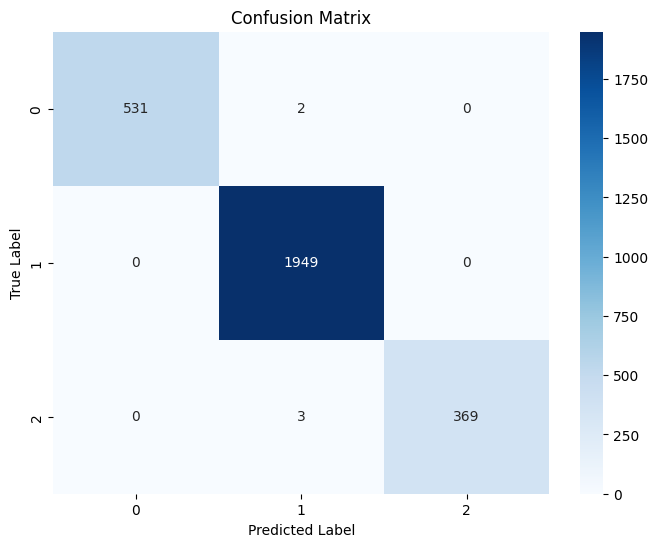

In [303]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [304]:
from sklearn.model_selection import cross_val_score


rf_scores = cross_val_score(model, X_train, y_train, cv=10)


print("Random Forest CV scores:", rf_scores)
print("Average CV accuracy (Random Forest):", np.mean(rf_scores))


Random Forest CV scores: [0.99737303 0.99912434 0.99824715 0.99737073 0.99824715 0.99824715
 0.99737073 0.99737073 0.99561788 0.9964943 ]
Average CV accuracy (Random Forest): 0.9975463192486389


GRADIENT BOOST

In [305]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", gb.score(X_test, y_test))

Gradient Boosting Accuracy: 0.9978976874562018


In [306]:
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [307]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9997371188222923
Testing Accuracy: 0.9978976874562018


In [308]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

Classification Report:

              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       533
      SEDANG       1.00      1.00      1.00      1949
 TIDAK SEHAT       1.00      0.99      0.99       372

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



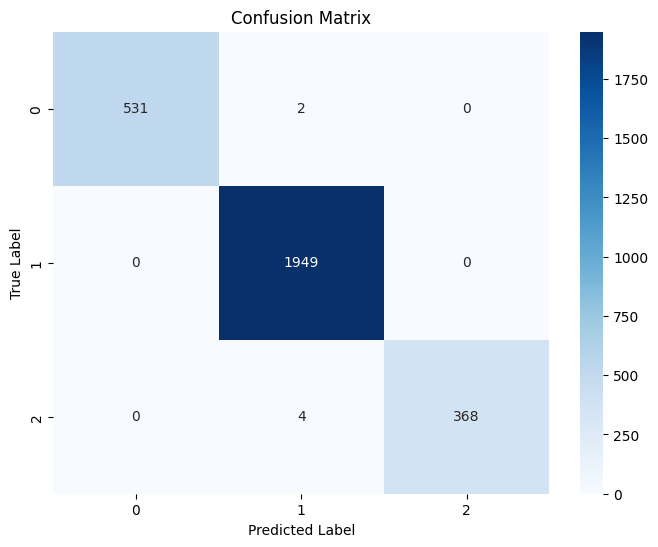

In [309]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [310]:
gb_scores = cross_val_score(gb, X_train, y_train, cv=15)


print("Gradient Boosting CV scores:", gb_scores)
print("Average CV accuracy (Gradient Boosting):", np.mean(gb_scores))

Gradient Boosting CV scores: [0.99868594 0.99605782 0.99868594 0.99868594 0.99605782 0.99474376
 0.99605782 0.99737188 0.99868594 0.99868594 0.9934297  1.
 0.99473684 0.99868421 0.99736842]
Average CV accuracy (Gradient Boosting): 0.9971958641676463


ENSEMBLE LEARNING

In [311]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier())
]

meta_learner = RandomForestClassifier()

stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=15)
stack_model.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", stack_model.score(X_test, y_test))


Stacking Classifier Accuracy: 0.9975473020322354


In [312]:
train_accuracy = stack_model.score(X_train, y_train)
test_accuracy = stack_model.score(X_test, y_test)


In [313]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9985103399929899
Testing Accuracy: 0.9975473020322354


In [314]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

Classification Report:

              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       533
      SEDANG       1.00      1.00      1.00      1949
 TIDAK SEHAT       1.00      0.99      0.99       372

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



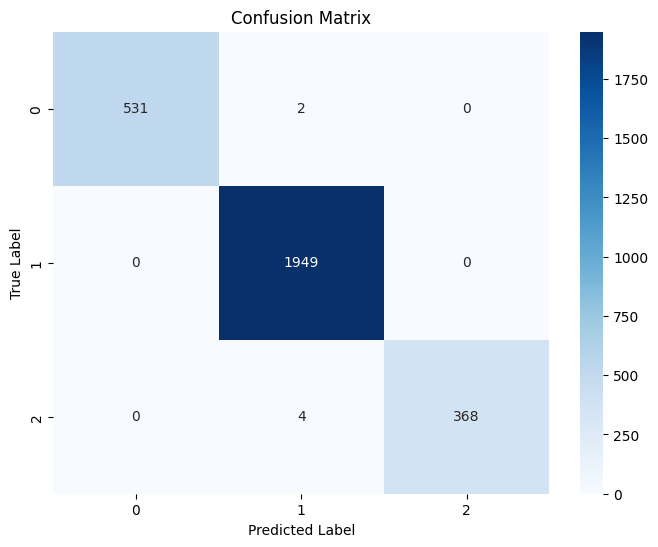

In [315]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [316]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(stack_model, X_train, y_train, cv=15)


print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.99868594 0.99737188 1.         0.99868594 0.99868594 0.99605782
 0.99605782 0.99868594 0.99868594 0.99868594 0.9934297  1.
 0.99342105 0.99868421 0.99605263]
Average CV accuracy: 0.9975460497498675


#### Data Setelah Balancing

C:\Users\Ferdinand lowata\AppData\Local\Temp\ipykernel_36560\4017049625.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


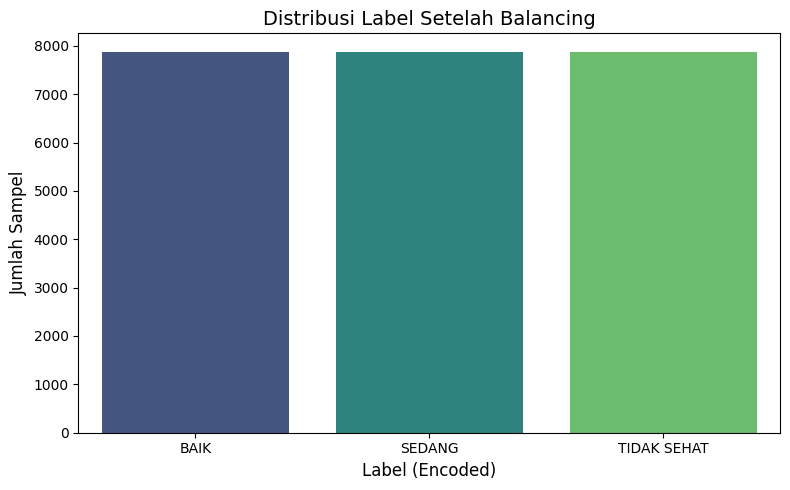

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

label_counts = pd.Series(y_train_bal).value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

plt.title("Distribusi Label Setelah Balancing", fontsize=14)
plt.xlabel("Label (Encoded)", fontsize=12)
plt.ylabel("Jumlah Sampel", fontsize=12)
plt.xticks(ticks=label_counts.index)

plt.tight_layout()
plt.show()

#### Randomforest After Balancing

In [318]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [319]:
y_train_pred = model.predict(X_train_bal)
y_test_pred = model.predict(X_test)

In [320]:
print("Training Accuracy:", accuracy_score(y_train_bal, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9985984583041345


In [321]:
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

Classification Report:

              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       533
      SEDANG       1.00      1.00      1.00      1949
 TIDAK SEHAT       1.00      0.99      1.00       372

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



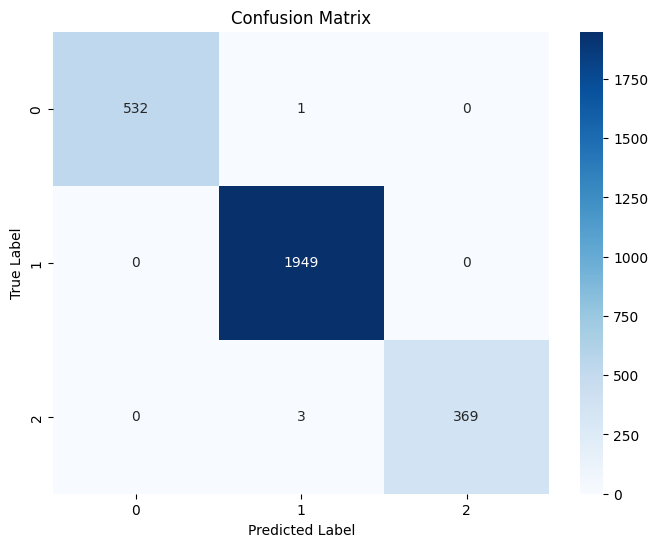

In [322]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [323]:
from sklearn.model_selection import cross_val_score


rf_scores = cross_val_score(model, X_train_bal, y_train_bal, cv=15)


print("Random Forest CV scores:", rf_scores)
print("Average CV accuracy (Random Forest):", np.mean(rf_scores))


Random Forest CV scores: [0.99936427 0.99936427 0.99936427 0.99936427 0.99872854 0.99936427
 0.99872854 0.99936427 1.         1.         0.99936427 1.
 1.         0.99872854 0.99936427]
Average CV accuracy (Random Forest): 0.9994066539521086


#### FAIRNESS MACHINE LEARNING FOR RANDOM FOREST

In [324]:
df.head()

,periode_data,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,kualitas_udara,pm10_level,pm10_so2_ratio,co_o3_interaction
0,201401,1/1/2014,DKI1 (Bunderan HI),0.8000,0.035242,0.950,0.373626,0.440678,0.544118,PM10,SEDANG,2,Sedang,22.693561,0.354945
1,201401,1/2/2014,DKI1 (Bunderan HI),0.5250,0.052863,0.700,0.402930,0.406780,0.404412,O3,SEDANG,2,Sedang,9.929372,0.282051
2,201401,1/3/2014,DKI1 (Bunderan HI),0.5875,0.070485,0.975,0.476190,0.440678,0.477941,O3,SEDANG,2,Sedang,8.333974,0.464286
3,201401,1/4/2014,DKI1 (Bunderan HI),0.5250,0.105727,0.725,0.388278,0.474576,0.389706,O3,SEDANG,2,Sedang,4.965155,0.281502
4,201401,1/5/2014,DKI1 (Bunderan HI),0.3250,0.052863,0.425,0.329670,0.338983,0.330882,O3,BAIK,3,Rendah,6.146754,0.140110


In [325]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['pm10']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.5125000000000001: 0.3568
Positive rate untuk grup sensitive > 0.5125000000000001: 0.0000
Demographic Parity Difference: 0.3568


In [326]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['so2']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.3524229074889868: 0.2308
Positive rate untuk grup sensitive > 0.3524229074889868: 0.1402
Demographic Parity Difference: 0.0906


In [327]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['co']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.375: 0.2011
Positive rate untuk grup sensitive > 0.375: 0.1704
Demographic Parity Difference: 0.0306


In [328]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['o3']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.358974358974359: 0.3544
Positive rate untuk grup sensitive > 0.358974358974359: 0.0149
Demographic Parity Difference: 0.3395


In [329]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['no2']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.3728813559322034: 0.2515
Positive rate untuk grup sensitive > 0.3728813559322034: 0.1164
Demographic Parity Difference: 0.1352


In [330]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['max']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.4926470588235294: 0.3607
Positive rate untuk grup sensitive > 0.4926470588235294: 0.0000
Demographic Parity Difference: 0.3607


#### Gradient Boost After Balancing

In [331]:
gb = GradientBoostingClassifier()
gb.fit(X_train_bal, y_train_bal)
print("Gradient Boosting Accuracy:", gb.score(X_test, y_test))

Gradient Boosting Accuracy: 0.9975473020322354


In [332]:
y_train_pred = gb.predict(X_train_bal)
y_test_pred = gb.predict(X_test)

In [333]:

print("Training Accuracy:", accuracy_score(y_train_bal, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9997033269760542
Testing Accuracy: 0.9975473020322354


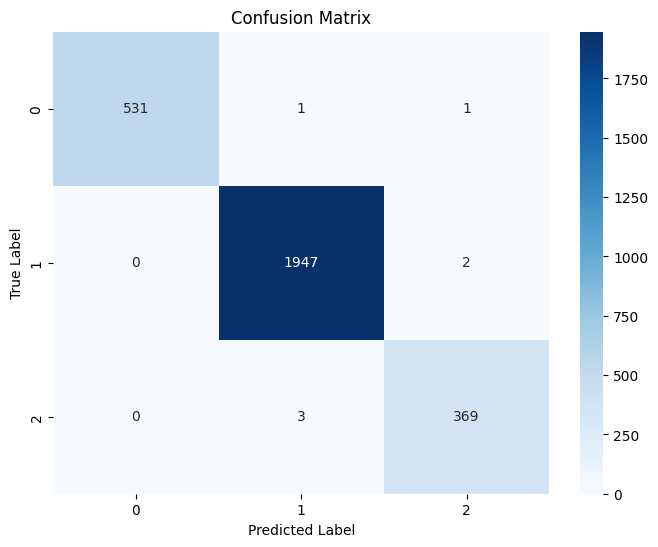

In [334]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [335]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

Classification Report:

              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       533
      SEDANG       1.00      1.00      1.00      1949
 TIDAK SEHAT       0.99      0.99      0.99       372

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



In [336]:
gb_scores = cross_val_score(gb, X_train_bal, y_train_bal, cv=15)


print("Gradient Boosting CV scores:", gb_scores)
print("Average CV accuracy (Gradient Boosting):", np.mean(gb_scores))

Gradient Boosting CV scores: [0.99936427 0.99936427 0.99809282 1.         0.99809282 0.99872854
 0.99872854 0.99872854 1.         0.99936427 0.99936427 1.
 1.         0.99872854 1.        ]
Average CV accuracy (Gradient Boosting): 0.9992371265098537


#### FAIRNESS MACHICHE LEARNING FOR XGBOOST

In [337]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['pm10']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.5125000000000001: 0.3561
Positive rate untuk grup sensitive > 0.5125000000000001: 0.0000
Demographic Parity Difference: 0.3561


In [338]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['so2']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.3524229074889868: 0.2308
Positive rate untuk grup sensitive > 0.3524229074889868: 0.1395
Demographic Parity Difference: 0.0913


In [339]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['co']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.375: 0.2004
Positive rate untuk grup sensitive > 0.375: 0.1704
Demographic Parity Difference: 0.0300


In [340]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['o3']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.358974358974359: 0.3537
Positive rate untuk grup sensitive > 0.358974358974359: 0.0149
Demographic Parity Difference: 0.3388


In [341]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['no2']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.3728813559322034: 0.2515
Positive rate untuk grup sensitive > 0.3728813559322034: 0.1156
Demographic Parity Difference: 0.1359


In [342]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['max']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.4926470588235294: 0.3600
Positive rate untuk grup sensitive > 0.4926470588235294: 0.0000
Demographic Parity Difference: 0.3600


#### Ensemble Learning After Balancing

In [343]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

base_learners = [
    ('bagged_lr', BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, bootstrap=True, random_state=42)),
    ('bagged_nb', BaggingClassifier(estimator=GaussianNB(), n_estimators=10, bootstrap=True, random_state=42)),
    ('bagged_dt', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, bootstrap=True, random_state=42))
]

meta_learner = RandomForestClassifier(random_state=42)

stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    passthrough=False
)

stack_model.fit(X_train_bal, y_train_bal)

accuracy = stack_model.score(X_test, y_test)
print("Stacking Classifier with Bootstrap Accuracy:", accuracy)

Stacking Classifier with Bootstrap Accuracy: 0.9985984583041345


In [344]:
train_accuracy = stack_model.score(X_train_bal, y_train_bal)
test_accuracy = stack_model.score(X_test, y_test)


In [345]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.999872854418309
Testing Accuracy: 0.9985984583041345


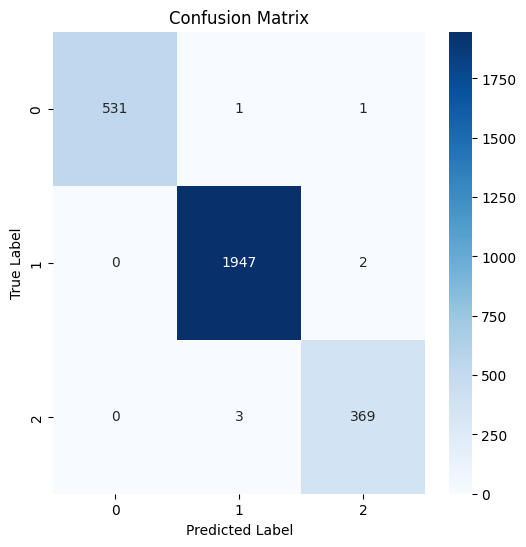

In [346]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [347]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(stack_model, X_train, y_train, cv=15)


print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [1.         0.99737188 0.99868594 0.99868594 0.99605782 0.99605782
 0.99605782 0.99737188 0.99868594 0.99868594 0.9934297  1.
 0.99605263 0.99605263 0.99736842]
Average CV accuracy: 0.997370956958757


#### FAIRNESS MACHINE LEARNING FOR ENSEMBLE LEARNING

In [348]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['pm10']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.5125000000000001: 0.3561
Positive rate untuk grup sensitive > 0.5125000000000001: 0.0000
Demographic Parity Difference: 0.3561


In [349]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['so2']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

# Hitung positive rate per grup
def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.3524229074889868: 0.2308
Positive rate untuk grup sensitive > 0.3524229074889868: 0.1395
Demographic Parity Difference: 0.0913


In [350]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['co']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.375: 0.2004
Positive rate untuk grup sensitive > 0.375: 0.1704
Demographic Parity Difference: 0.0300


In [351]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['o3']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.358974358974359: 0.3537
Positive rate untuk grup sensitive > 0.358974358974359: 0.0149
Demographic Parity Difference: 0.3388


In [352]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['no2']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.3728813559322034: 0.2515
Positive rate untuk grup sensitive > 0.3728813559322034: 0.1156
Demographic Parity Difference: 0.1359


In [353]:
import numpy as np

y_test_pred = np.array(y_test_pred)

positive_class = 'BAIK'

y_pred_positive = (y_test_pred == positive_class).astype(int)

sensitive_attr = X_test['max']
threshold = sensitive_attr.median()

group_0_idx = (sensitive_attr <= threshold).to_numpy()
group_1_idx = (sensitive_attr > threshold).to_numpy()

def positive_rate(y_pred_subset):
    return np.mean(y_pred_subset)

pos_rate_0 = positive_rate(y_pred_positive[group_0_idx])
pos_rate_1 = positive_rate(y_pred_positive[group_1_idx])

print(f"Positive rate untuk grup sensitive <= {threshold}: {pos_rate_0:.4f}")
print(f"Positive rate untuk grup sensitive > {threshold}: {pos_rate_1:.4f}")

demographic_parity_diff = abs(pos_rate_0 - pos_rate_1)
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Positive rate untuk grup sensitive <= 0.4926470588235294: 0.3600
Positive rate untuk grup sensitive > 0.4926470588235294: 0.0000
Demographic Parity Difference: 0.3600


Jika dilihat darii hasil perbandingan positive rate pada setiap feature yang digunakan pada data input untuk melatih machine learning didapatkan hasilnya cukup seimbang terutama pada feature max. Selain itu dari hasil DPD atau Demographic Parity Difference yang didapatkan, hasilnya hampir mendekati 0 yang berarti model yang dibangun adil dalam distribusi label positif antar kelompok atau model dapat memprediksi positif dengan proporsi hampir sama untuk kedua grup.

#### TESTING WITH NEW DATA

##### RANDOM FOREST

In [354]:
def handle_outliers(df, cols, lower_percentile=1, upper_percentile=99):
    df_out = df.copy()
    for col in cols:
        lower_bound = np.percentile(df_out[col], lower_percentile)
        upper_bound = np.percentile(df_out[col], upper_percentile)
        # Capping / Winsorizing
        df_out[col] = np.where(df_out[col] < lower_bound, lower_bound, df_out[col])
        df_out[col] = np.where(df_out[col] > upper_bound, upper_bound, df_out[col])
    return df_out

In [355]:
data = pd.read_csv('ispu_dki1.csv')

In [356]:
data.head()

,tanggal,stasiun,pm25,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),NaN,60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),NaN,32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),NaN,27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),NaN,22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),NaN,25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


In [357]:
data.dropna(inplace=True)

In [358]:
data_filtered = data[data['categori'] != 'SANGAT TIDAK SEHAT'].copy()

numeric_cols = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']
X_new_raw = data_filtered[numeric_cols].astype(float)

X_new_no_outliers = handle_outliers(X_new_raw, numeric_cols)

In [359]:
X_new_scaled = scaler.transform(X_new_no_outliers)

y_new = data_filtered['categori']

y_pred = model.predict(X_new_scaled)

c:\Anaconda\envs\datnal\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [360]:
print("Akurasi pada dataset baru:", accuracy_score(y_new, y_pred))
print(classification_report(y_new, y_pred))

Akurasi pada dataset baru: 0.9813167259786477
              precision    recall  f1-score   support

        BAIK       1.00      0.89      0.94       180
      SEDANG       0.98      1.00      0.99       900
 TIDAK SEHAT       0.96      1.00      0.98        44

    accuracy                           0.98      1124
   macro avg       0.98      0.96      0.97      1124
weighted avg       0.98      0.98      0.98      1124



In [361]:
cv_scores = cross_val_score(model, X_new_scaled, y_new, cv=15)

# Hasil
print("Cross-Validation Scores:", cv_scores)
print("Rata-rata Akurasi Cross-Validation:", np.mean(cv_scores))

Cross-Validation Scores: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.97333333 0.97333333 0.93243243]
Rata-rata Akurasi Cross-Validation: 0.9919399399399398


#### Gradient Boost

In [362]:
X_new_scaled = scaler.transform(X_new_no_outliers)

y_new = data_filtered['categori']

y_pred = gb.predict(X_new_scaled)

c:\Anaconda\envs\datnal\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [363]:
print("Akurasi pada dataset baru:", accuracy_score(y_new, y_pred))
print(classification_report(y_new, y_pred))

Akurasi pada dataset baru: 0.9804270462633452
              precision    recall  f1-score   support

        BAIK       0.99      0.89      0.94       180
      SEDANG       0.98      1.00      0.99       900
 TIDAK SEHAT       0.96      1.00      0.98        44

    accuracy                           0.98      1124
   macro avg       0.98      0.96      0.97      1124
weighted avg       0.98      0.98      0.98      1124



In [364]:
cv_scores = cross_val_score(gb, X_new_scaled, y_new, cv=15)

# Hasil
print("Cross-Validation Scores:", cv_scores)
print("Rata-rata Akurasi Cross-Validation:", np.mean(cv_scores))

Cross-Validation Scores: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.98666667 1.         1.
 0.97333333 0.97333333 0.93243243]
Rata-rata Akurasi Cross-Validation: 0.991051051051051


#### Ensemble Learning

In [365]:
X_new_scaled = scaler.transform(X_new_no_outliers)

y_new = data_filtered['categori']

y_pred = stack_model.predict(X_new_scaled)

c:\Anaconda\envs\datnal\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
c:\Anaconda\envs\datnal\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
c:\Anaconda\envs\datnal\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [366]:
print("Akurasi pada dataset baru:", accuracy_score(y_new, y_pred))
print(classification_report(y_new, y_pred))

Akurasi pada dataset baru: 0.9750889679715302
              precision    recall  f1-score   support

        BAIK       0.98      0.88      0.92       180
      SEDANG       0.98      0.99      0.98       900
 TIDAK SEHAT       0.96      1.00      0.98        44

    accuracy                           0.98      1124
   macro avg       0.97      0.96      0.96      1124
weighted avg       0.98      0.98      0.97      1124



In [367]:
cv_scores = cross_val_score(stack_model, X_new_scaled, y_new, cv=15)

# Hasil
print("Cross-Validation Scores:", cv_scores)
print("Rata-rata Akurasi Cross-Validation:", np.mean(cv_scores))

Cross-Validation Scores: [1.         1.         1.         1.         0.98666667 1.
 1.         1.         1.         0.98666667 1.         1.
 0.97333333 0.97333333 0.94594595]
Rata-rata Akurasi Cross-Validation: 0.9910630630630629


#### MODELLING USING DATA BEFORE COVID

In [368]:
df_normalized['tahun'] = df_normalized['periode_data'].astype(str).str[:4].astype(int)

df_filtered = df_normalized[df_normalized['tahun'].between(2014, 2018)]

In [369]:
X = df_filtered[numeric_cols]
y = df_filtered['categori']

In [370]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Random Forest

In [371]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi model: 1.0

 Classification Report:
              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       316
      SEDANG       1.00      1.00      1.00       912
 TIDAK SEHAT       1.00      1.00      1.00       169

    accuracy                           1.00      1397
   macro avg       1.00      1.00      1.00      1397
weighted avg       1.00      1.00      1.00      1397



XGBOOST

In [372]:
y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi model: 1.0

 Classification Report:
              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       316
      SEDANG       1.00      1.00      1.00       912
 TIDAK SEHAT       1.00      1.00      1.00       169

    accuracy                           1.00      1397
   macro avg       1.00      1.00      1.00      1397
weighted avg       1.00      1.00      1.00      1397



Ensemble Learning

In [373]:
y_pred = stack_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi model: 1.0

 Classification Report:
              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       316
      SEDANG       1.00      1.00      1.00       912
 TIDAK SEHAT       1.00      1.00      1.00       169

    accuracy                           1.00      1397
   macro avg       1.00      1.00      1.00      1397
weighted avg       1.00      1.00      1.00      1397



#### MODELLING USING DATA DURING COVID

In [374]:
df_filtered = df_normalized[df_normalized['tahun'].between(2019, 2022)]

In [375]:
X = df_filtered[numeric_cols]
y = df_filtered['categori']

In [376]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Random Forest

In [377]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi model: 1.0

 Classification Report:
              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       156
      SEDANG       1.00      1.00      1.00       823
 TIDAK SEHAT       1.00      1.00      1.00       176

    accuracy                           1.00      1155
   macro avg       1.00      1.00      1.00      1155
weighted avg       1.00      1.00      1.00      1155



XGBOOST

In [378]:
y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi model: 0.9982683982683983

 Classification Report:
              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       156
      SEDANG       1.00      1.00      1.00       823
 TIDAK SEHAT       0.99      1.00      0.99       176

    accuracy                           1.00      1155
   macro avg       1.00      1.00      1.00      1155
weighted avg       1.00      1.00      1.00      1155



ENSEMBLE LEARNING

In [379]:
y_pred = stack_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi model: 1.0

 Classification Report:
              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       156
      SEDANG       1.00      1.00      1.00       823
 TIDAK SEHAT       1.00      1.00      1.00       176

    accuracy                           1.00      1155
   macro avg       1.00      1.00      1.00      1155
weighted avg       1.00      1.00      1.00      1155



#### MODELLING USING DATA POST COVID

In [380]:
df_filtered = df_normalized[df_normalized['tahun'].between(2013, 2024)]

In [381]:
X = df_filtered[numeric_cols]
y = df_filtered['categori']

In [382]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Random Forest

In [383]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi model: 1.0

 Classification Report:
              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       506
      SEDANG       1.00      1.00      1.00      1963
 TIDAK SEHAT       1.00      1.00      1.00       385

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



XGBOOST

In [384]:
y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi model: 1.0

 Classification Report:
              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       506
      SEDANG       1.00      1.00      1.00      1963
 TIDAK SEHAT       1.00      1.00      1.00       385

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



Ensemble Learning

In [385]:
y_pred = stack_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi model: 1.0

 Classification Report:
              precision    recall  f1-score   support

        BAIK       1.00      1.00      1.00       506
      SEDANG       1.00      1.00      1.00      1963
 TIDAK SEHAT       1.00      1.00      1.00       385

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854

